# tf.keras or keras API -- ImageDataGenerator
This api generates batches of tensor image data with real-time data augmentation. Quite useful especially you don't have a sufficient amount of training data.
[Reference](https://keras.io/preprocessing/image/#imagedatagenerator-class)
___
A picture is worth a thousand words

In [1]:
# import necessary package
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Load the fashion mnist dataset of tf.keras

In [2]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = f_mnist.load_data()
print("training set shape:{}".format(X_train.shape))
print("test set shape:{}".format(X_test.shape))

training set shape:(60000, 28, 28)
test set shape:(10000, 28, 28)


Let's first show the first 10 images.

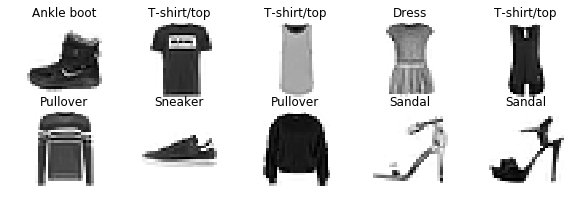

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
ax = plt.figure(figsize=(10,3))
for i in range(0, 10):
    ax.add_subplot(2,5,i+1) 
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    #plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(class_names[y_train[i]])
    plt.axis('off')

Change the image shape: (28,28) - > (28,28,1)

In [4]:
# add one dimension (channel) to each image, ImageDataGenerator
# requires the channel parameter
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Image Rotation**

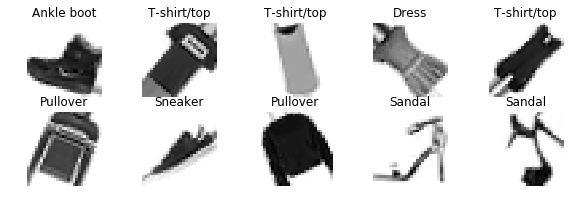

In [5]:
generator = ImageDataGenerator(rotation_range=60)
generator.fit(X_train)
ax = plt.figure(figsize=(10,3))

for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=10,shuffle=False):
    for i in range(0, 10):
        ax.add_subplot(2,5,i+1) 
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.cm.binary)
        #plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
        plt.title(class_names[y_batch[i]])
        plt.axis('off')
    # stop after one iteration
    break

**Image Random Flips**

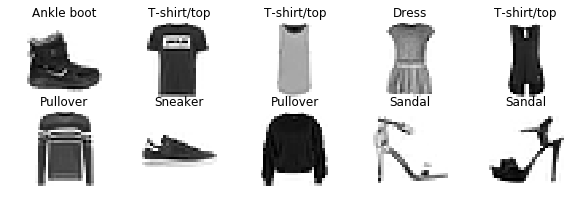

In [6]:
generator = ImageDataGenerator(horizontal_flip=True, 
                               vertical_flip=False)
generator.fit(X_train)
ax = plt.figure(figsize=(10,3))

for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=10,shuffle=False):
    for i in range(0, 10):
        ax.add_subplot(2,5,i+1) 
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.cm.binary)
        #plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
        plt.title(class_names[y_batch[i]])
        plt.axis('off')
    # stop after one iteration
    break

## We can request multiple operations within one generator

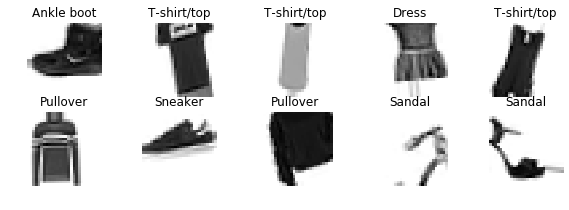

In [7]:
generator = ImageDataGenerator(horizontal_flip=True, 
                               vertical_flip=False,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2)
generator.fit(X_train)
ax = plt.figure(figsize=(10,3))

for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=10,shuffle=False):
    for i in range(0, 10):
        ax.add_subplot(2,5,i+1) 
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.cm.binary)
        #plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
        plt.title(class_names[y_batch[i]])
        plt.axis('off')
    # stop after one iteration
    break